# Project 14:
# Real estate analayzing - new neighborhood project

### Publishers:
# **Amit Levy**
# **Asaf Ben Zvi**
# **Oriya Cohen**
# **Shaked Yaacov**

##### To the data source [click here](https://www.kaggle.com/datasets/arathipraj/house-data)

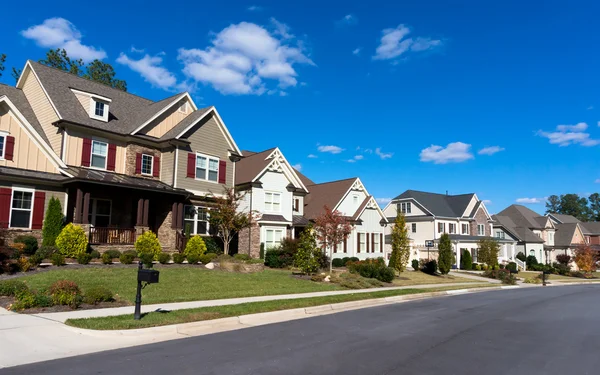

In [1]:
from IPython import display
display.Image("https://st.depositphotos.com/1658611/3469/i/600/depositphotos_34698097-stock-photo-street-of-large-suburban-homes.jpg")


## Table of Contents:
#### •	Opening and displaying the data
#### •	Data arrangement and understanding
#### •	Analysis
#### •	Conclusions


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn as sk
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython import display


# Opening and displaying the data

### The dataset:

##### The dataset consists of Price of Houses in King County , Washington from sales between May 2014 and May 2015. Along with house price it consists of information on 18 house features, date of sale and ID of sale.


### About our project:

##### We are part of a real estate company that wants to establish a residential neighborhood in Washington that can be attractive to the entire population, for that we took data that shows real estate transactions in a residential neighborhood in Washington that has about 21,000 houses, and from this data we will make strategic segmentations that will lead us to the goal.

### Explanation of the columns:
|Column|Description|
|:-----|:----------|
| id| unique for each home sold|
| date| Date of the home saled|
| price|  Price of each home sold (in dollar)|
| bedrooms | Number of bedrooms|
| bathrooms |  Number of bathrooms|
| sqft_living | Square footage of the apartments interior living space (in cm)|
| sqft _ lot | Square footage of the land space|
| floors | Number of floors|
| waterfront |  A dummy variable for whether the apartment was overlooking the waterfront or not|
| view | An index from 0 to 4 of how good the view of the property was|
| condition|  an index from 1 to 5 on the condition of the apartment|
| grade|An index from 1 to 13 that ranks the design level of the house|
| sqft _ above |  the square footage of the interior housing space that is above ground level|
| sqft _ basement |  the square footage of the inerior housing space that is below ground level|
| yr _ renovated | The year of the house's last renovation|
| yr_built| The year of the house was initially built|

 # Data arrangement and understanding

##### Missing values check:

In [3]:
url="https://raw.githubusercontent.com/AmitLevy1998/house-data/main/house_data.csv"
df = pd.read_csv(url)
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##### There is no missing values.

### Removing unnecessary columns:


In [4]:
house_df = df.iloc[:, :16]
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


##### Here are the columns that were removed: zip code, longitude lines (long), latitude lines (lat), the size of the built area of the 15 neighbors (sqft _ living15), the size of the general area of the 15 neighbors (sqft _ lot15).


# Analysis:

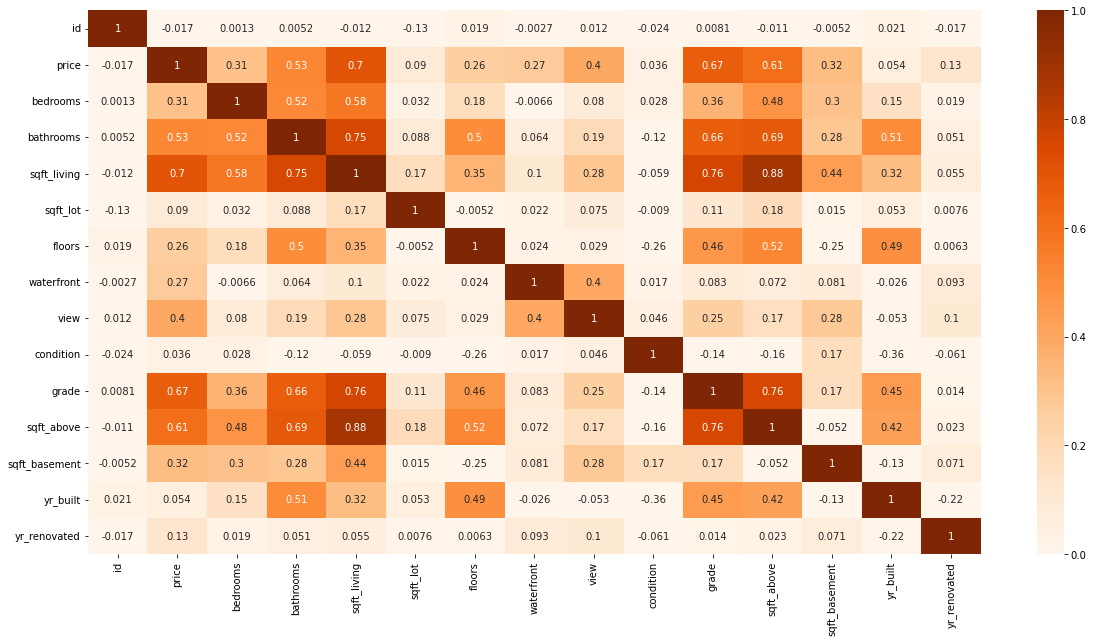

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
sns.heatmap(house_df.corr() , vmin=0.0 , vmax = 1,cmap='Oranges', annot=True);


##### You can see in the heatmap that there are many variables that have a strong connection between them, of which we have chosen four variables that are the most relevant to the establishment of the neighborhood and according to the heatmap we know on what to emphasis on in the residential project that is built.

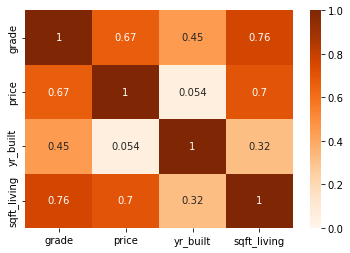

In [6]:
corr_data = house_df.loc[:, ["grade", "price", "yr_built", "sqft_living"]]
sns.heatmap(corr_data.corr(), vmin=0.0 , vmax = 1,cmap='Oranges' , annot=True);

##### Here, we reduced the heatmap by the most relevant attributes.

##### It can be seen that there is a strong relationship between the size of the house and the price, and between the size of the house and the score on its design. 
##### Following this, we would like to check the dispersions between the variables and thus know whether the data is in a decreasing/increasing/constant trend.

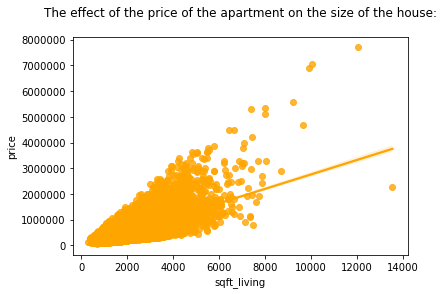

In [7]:
plt.ticklabel_format(style='plain')
sns.regplot(x='sqft_living', y='price', color='Orange', data=house_df);
plt.title("The effect of the price of the apartment on the size of the house:\n")
plt.show()

##### In this graph we notice that the more beautifully designed the house is, the more its price rises accordingly.

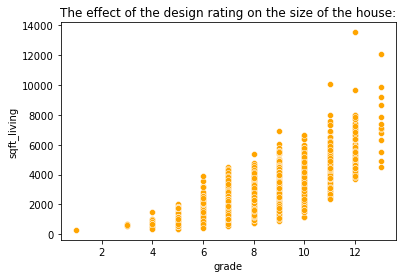

In [8]:
sns.scatterplot(data = house_df, x = 'grade', y = 'sqft_living', color='Orange')
plt.title("The effect of the design rating on the size of the house:")
plt.show()

##### In this graph you can see that the bigger the house, the higher level it is designed.

#### For the purpose of establishing the neighborhood, we wanted to check what the most common data were in the various variables relevant to the construction of the neighborhood, 
#### therefore we compiled an average of these columns in order to create a range based on which we would build the most adapted houses to the neighborhoods population. 

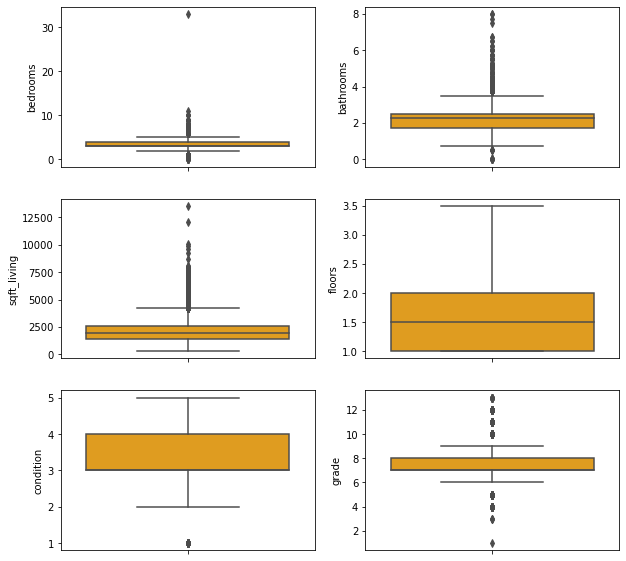

In [9]:
fig, axes = plt.subplots(figsize=(10,10), ncols=2, nrows=3)

sns.boxplot(data=house_df, y=house_df['bedrooms'], ax=axes[0,0], color='Orange')
sns.boxplot(data=house_df, y=house_df["bathrooms"],ax=axes[0,1], color='Orange')
sns.boxplot(data=house_df, y=house_df["sqft_living"],ax=axes[1,0], color='Orange')
sns.boxplot(data=house_df, y=house_df["floors"], ax=axes[1,1], color='Orange')
sns.boxplot(data=house_df, y=house_df["condition"], ax=axes[2,0], color='Orange')
sns.boxplot(data=house_df, y=house_df["grade"], ax=axes[2,1], color='Orange')
plt.show()

In [10]:
i_drop_bedrooms = house_df.loc[house_df['bedrooms']>6, :]
house_df.drop(i_drop_bedrooms.index, inplace=True)

i_drop_sqft_living = house_df.loc[house_df['sqft_living']>8000, :]
house_df.drop(i_drop_sqft_living.index, inplace=True)

i_drop_condition = house_df.loc[house_df['condition']<2, :]
house_df.drop(i_drop_condition.index, inplace=True)

i_drop_bathrooms =  house_df.loc[house_df["bathrooms"]>6, :]
house_df.drop(i_drop_bathrooms.index, inplace=True)

In [11]:
i_drop_grade1 = house_df.loc[house_df['grade']<5, :] 
i_drop_grade2 = house_df.loc[house_df['grade']>11, :] 
i_drop_grade = []

for i in i_drop_grade1.index:
    i_drop_grade.append(i)

for i in i_drop_grade2.index:
    i_drop_grade.append(i)  

house_df.drop(i_drop_grade, inplace=True)

In [12]:
avg_house_parameters = ["sqft_living", "condition", "bathrooms", "grade", "floors","bedrooms"]

for i in avg_house_parameters:
    avg = house_df[i].mean()
    print(f"the average {i}: {avg}")

the average sqft_living: 2060.4458991863835
the average condition: 3.4141026839988777
the average bathrooms: 2.1036542597961283
the average grade: 7.6416814738614045
the average floors: 1.4926353689329468
the average bedrooms: 3.357056017955672


##### For the purpose of building the ideal neighborhood, we chose six attributes that we think are the most important for this purpose.
##### That's why we wanted to check how much abnormal data each of the columns we selected has, when there weren't many values we removed them from the data so they wouldn't affect the average much.

### The mean attributes of the houses in the neighborhood:
|Attributes|Mean|
|:-----|:----------|
| bedrooms | 3.35 |
| bathrooms | 2.1 |
| sqft_living | 2060 |
| floors | 1.5 |
| condition | 3.4 |
| grade | 7.65 |

##### After checking the average, we set ranges for the various variables based on it, which will be the basis for how we will build the neighborhood in a way that will suit as many optional customers as possible.

In [13]:
filtter_bathrooms = (house_df.bathrooms >= 1.5) & (house_df.bathrooms <= 2.5)
filtter_bedrooms = (house_df.bedrooms >= 3) & (house_df.bedrooms <= 4)
filtter_floors = (house_df.floors >= 1) & (house_df.floors <= 2)
filtter_grade = (house_df.grade >= 7) & (house_df.grade <= 8)
filtter_sqftliving = (house_df.sqft_living >= 1500) & (house_df.sqft_living <= 2500)
filtter_condition = (house_df.condition >= 3) & (house_df.condition <= 4)

In [14]:
house_df2 = house_df[filtter_bathrooms & filtter_bedrooms & filtter_floors& filtter_grade & filtter_sqftliving & filtter_condition].reset_index()


##### We will check if there is an effect of the year of construction on the price of the apartment to check if it will even pay for us to build such a neighborhood at this time.

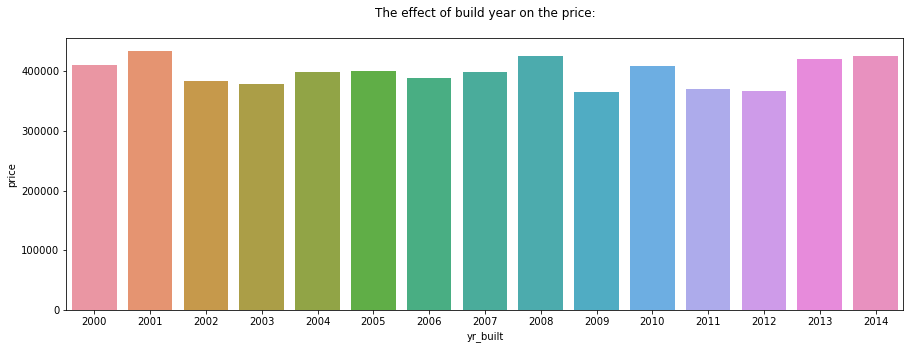

In [15]:
rbuilt_df = house_df2.loc[house_df2["yr_built"] >= 2000, :]

fig, axes = plt.subplots(figsize=(15,5))
sns.barplot(data = rbuilt_df, x='yr_built', y='price', ci=None)
plt.title('The effect of build year on the price:\n')
plt.show()

##### As we can see, suprisingly, a newer house doesn't mean a more expansive house.

##### After we have found the ideal house, we will want to find the ideal price that we would like to aim for in the pricing of the apartments.

# Prediction of the houses price:

### Classification

In [16]:
def eval(x,y,model):
    pred = model.predict(x)
    y_alt=y.values
    print("Acc: {:.3f}".format((pred == y_alt).mean()))
    print("MSE: {:.3f}".format(mse(pred,y,squared=False)))   

In [17]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True, 
                   rounded = True,
                   fontsize=15)  
    plt.show

In [18]:
features = ["sqft_living", "grade","bathrooms","bedrooms", "floors", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"]
pred_label = ["price"]

In [19]:
x = house_df2[features]
y = house_df2[pred_label]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

Depth: 3
Acc: 0.007
MSE: 153025.266


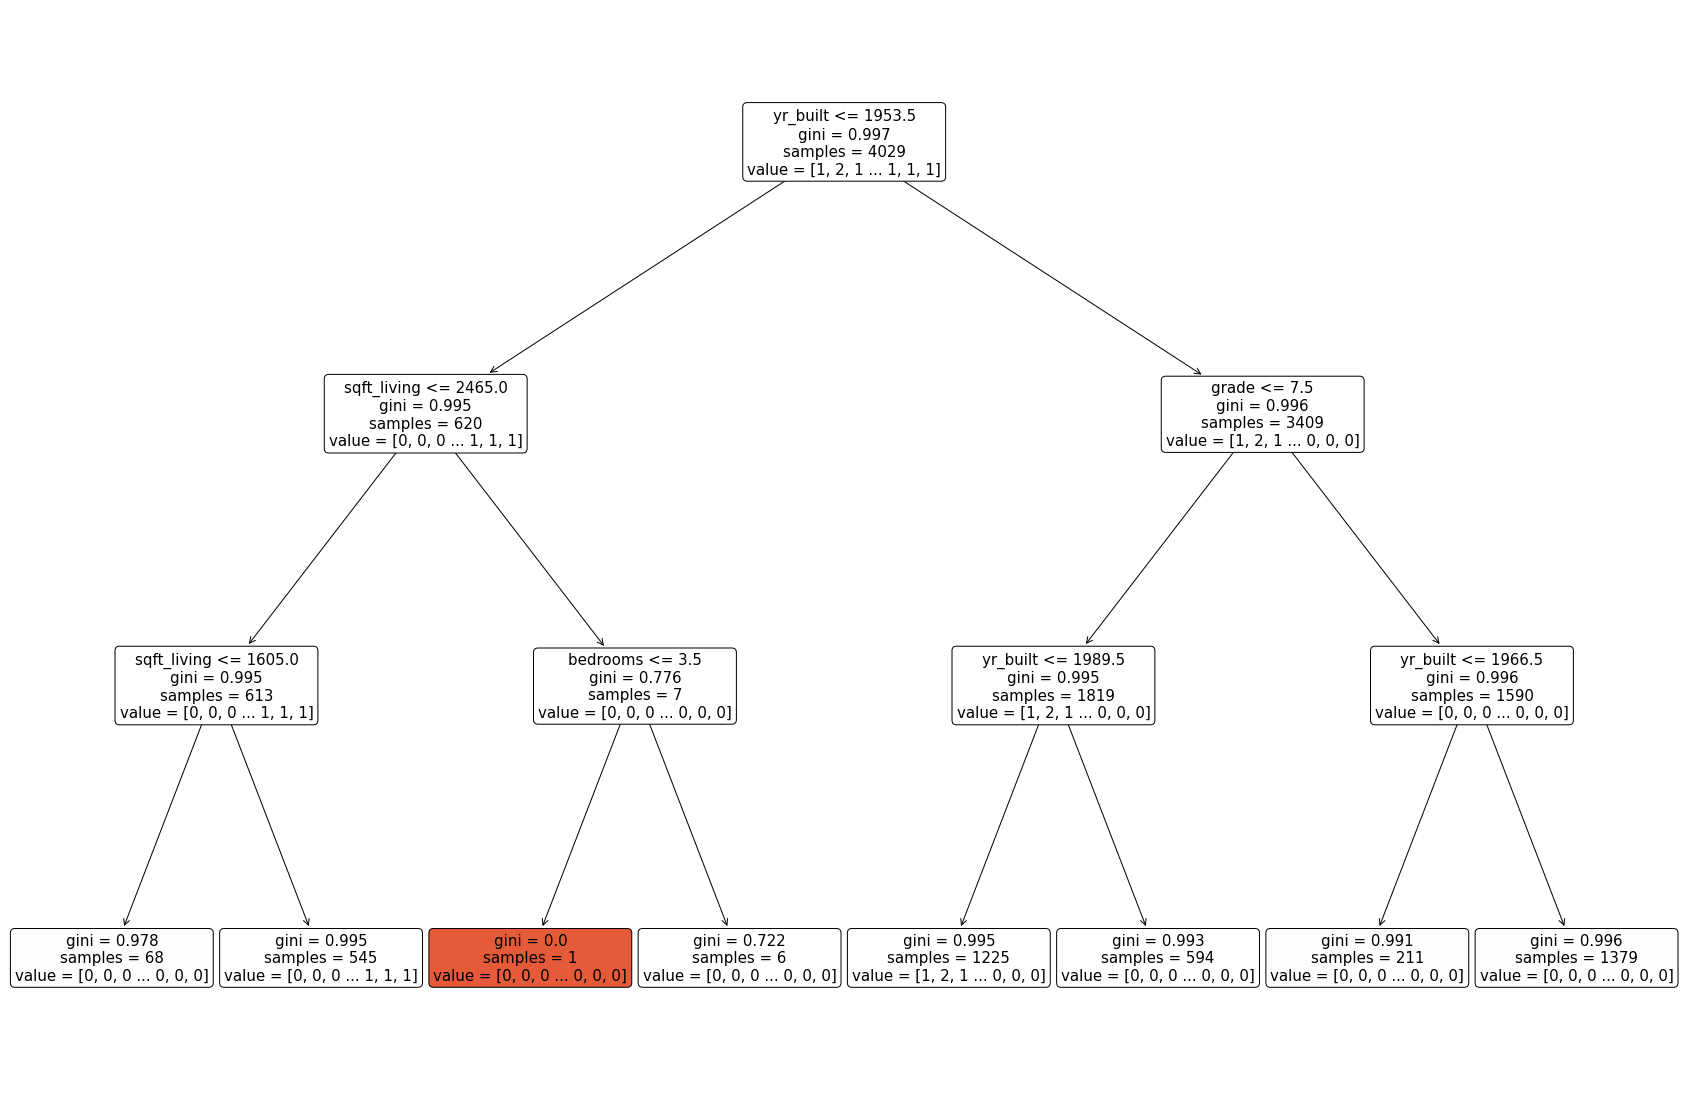

In [20]:
classifi_model = DecisionTreeClassifier(max_depth=3, random_state=10)

classifi_model.fit(x_train,y_train)

print("Depth:",classifi_model.get_depth())
eval(x_test,y_test,classifi_model)
plot_tree(classifi_model , features,  size=(30,20))

### Regressor predict

In [21]:
regressor_model = DecisionTreeRegressor(random_state=10)
regressor_model.fit(x_train, y_train);


In [22]:
print("Making predictions for the following 5 houses:")
print(y_test.head())

print("The predictions are")
test_pred = regressor_model.predict(x_test)
print(test_pred)
print("MSE: {:.3f}".format(mse(y_test.values, test_pred , squared=False ) ))

Making predictions for the following 5 houses:
       price
1589  449950
5464  245000
2657  315000
758   359950
4670  566000
The predictions are
[760000. 285000. 290700. ... 600000. 295000. 190000.]
MSE: 194055.173


##### We chose the classification prediction because the lower 

# **Conclusions:**
#### •	 As we saw on the heat map, the Pearson correlation coefficient between the design's level and the price is 0.67 (moderate-high correlation) and 0.76 (high correlation)  between the design's level and the size of the house .The reason may be because people with fancier and bigger houses tending to design their house in a higher level, or because high level design increase the value of the house. Our recommendation to the real estate company is to emphasis the design level and to adjust it to the size of the house and to the population in the neighborhood.

#### •	 In order to understand the size and the measurements of the houses we want build, we chose to rely on the taste and the preferences of the local residents. We analyzed all of the houses in the neighborhood by parameters of size of the house, amount of bedrooms, bathrooms and floors, condition and as said in the previous conclusion, the design level. According to the analysis, the 3 most desirable houses will have the following attributes:







In [56]:
attributes = pd.DataFrame([["?" ,3, 1.5, 1840, 1.5, 4, 8, 0, 0], ["?" ,4, 2, 2010, 2, 4, 8, 0, 0]], 
             columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'waterfront', 'view'], 
             index=['5758', '5759'])
new_houses = house_df2.append(attributes)
new_houses.drop(['index','id','date','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_lot'] ,inplace=True , axis=1)
new_houses.tail(2)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade
5758,?,3,1.50,1840,1.5,0,0,4,8
5759,?,4,1.75,2010,2.0,0,0,4,8


#### •	For the sake of marketing the new houses, the real estate company needed approximated price of each type of house. To do that, we built a model that will predict the price of the new houses according to prices of similar houses in the neighborhood. The presumption is that the price of new houses will be similar to houses with the same attributes because we saw that the Pearson correlation coefficient between the year of built to the price is 0.054 (very low correlation). The expected prices are: 

In [58]:
"sqft_living", "grade","bathrooms","bedrooms", "floors", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"
house_1 = classifi_model.predict([[1840,8, 1.5, 3, 1.50, 4, 1840, 0, 2015, 0]])
house_2 = classifi_model.predict([[2010,8, 2, 4, 2.00, 4, 2010, 0, 2015, 0]])
print ("The predicted price for the first house is:", house_1)
print("The predicted price for the second house is:",house_2)

The predicted price for the first house is: [500000]
The predicted price for the second house is: [500000]


In [51]:
new_houses["price"].replace("?", 500000, inplace = True)
colored_col=new_houses.tail(2)
colored_col.style.apply(lambda x: ['background: orange' if x.name == 'price'
                          else '' for i in x])

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade
5758,500000,3,1.500000,1840,1.500000,0,0,4,8
5759,500000,4,1.750000,2010,2.000000,0,0,4,8
